##  Create the Dataset
generated a small dataset of ~200 sentences, each belonging to an emoji category such as:
- **Love** ❤️
- **Happiness** 😄
- **Sadness** 😢
- **Anger** 😡
- **Surprise** 😲

Each sentence is paired with its category label.

In [1]:
import pandas as pd
import random

# Define categories and emojis
categories = {
    "love": "❤️",
    "laugh": "😂",
    "sleepy": "😴",
    "sad": "😢",
    "angry": "😡",
    "celebrate": "🎉",
    "surprised": "😮",
    "food": "🍕",
    "sports": "⚽",
    "music": "🎵"
}

examples = {
    "love": [
        "I love programming", "You make me so happy", "Love is in the air",
        "My heart is full", "Feeling loved", "I adore you", "You mean the world to me",
        "So much love for this", "Heartwarming moment", "I'm in love"
    ],
    "laugh": [
        "That was hilarious", "I can't stop laughing", "LOL", "You're so funny",
        "Cracking up", "This joke made my day", "Funny stuff", "Laughing out loud",
        "Too funny", "I'm dying of laughter"
    ],
    "sleepy": [
        "I need a nap", "Feeling so tired", "Sleepy time", "Yawning so much",
        "Can't keep my eyes open", "Time for bed", "Exhausted", "So sleepy right now",
        "Need some rest", "Bedtime"
    ],
    "sad": [
        "I'm feeling down", "That was heartbreaking", "I'm so sad",
        "Feeling blue", "Crying all night", "Tears in my eyes", "Such a sad story",
        "Miserable day", "Feeling lonely", "Heartbroken"
    ],
    "angry": [
        "I'm so mad", "This is infuriating", "Feeling angry", "I'm furious",
        "Such an outrage", "Really annoyed", "This makes me angry",
        "I can't believe this", "So frustrated", "Fuming"
    ],
    "celebrate": [
        "Let's party", "Congratulations", "We did it", "Happy birthday",
        "Time to celebrate", "Cheers to us", "Great achievement", "Big celebration",
        "Proud moment", "Hooray"
    ],
    "surprised": [
        "Wow I didn't expect that", "That's shocking", "Unbelievable",
        "What a surprise", "Totally unexpected", "Oh my gosh",
        "Can't believe it", "No way", "This is surprising", "Amazed"
    ],
    "food": [
        "I love pizza", "Hungry for burgers", "Delicious meal", "Craving pasta",
        "Time for lunch", "Let's grab dinner", "Yummy", "I want some snacks",
        "Tasty food", "This cake is amazing"
    ],
    "sports": [
        "I love football", "Playing basketball", "Training hard",
        "Watching the match", "Goal!", "Great game today", "Team spirit",
        "Tennis practice", "Going for a run", "Scored a point"
    ],
    "music": [
        "Listening to music", "I love this song", "Great concert",
        "Playing guitar", "Singing my heart out", "Musical vibes",
        "Piano practice", "Band rehearsal", "Awesome playlist", "Humming a tune"
    ]
}

dataset = []
label_id = 0
for label, emoji in categories.items():
    sentences = examples[label]
    # duplicate sentences with small random variations to reach ~20 per category
    while len(sentences) < 20:
        sentences.append(sentences[random.randint(0, 9)] + "!")
    for sent in sentences:
        dataset.append([sent, label, emoji, label_id])
    label_id += 1

#  DataFrame
df = pd.DataFrame(dataset, columns=["sentence", "label", "emoji", "label_id"])
print(df.sample(10))
print(f"\nTotal dataset size: {len(df)} rows")


                     sentence      label emoji  label_id
50   Can't keep my eyes open!     sleepy     😴         2
61     That was heartbreaking        sad     😢         3
166               Team spirit     sports     ⚽         8
72             Miserable day!        sad     😢         3
31     This joke made my day!      laugh     😂         1
154           Time for lunch!       food     🍕         7
103            Happy birthday  celebrate     🎉         5
5                 I adore you       love    ❤️         0
43            Yawning so much     sleepy     😴         2
138             Unbelievable!  surprised     😮         6

Total dataset size: 200 rows


##  Text Preprocessing

- Convert text to lowercase.
- Remove stop words using NLTK's English stopword list.
This reduces noise and keeps only meaningful words for model training.


In [2]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')

# Contraction map
contractions = {
    "i'm": "i am",
    "i've": "i have",
    "you're": "you are",
    "you've": "you have",
    "he's": "he is",
    "she's": "she is",
    "it's": "it is",
    "we're": "we are",
    "they're": "they are",
    "can't": "cannot",
    "won't": "will not",
    "didn't": "did not",
    "don't": "do not",
    "doesn't": "does not",
    "isn't": "is not",
    "aren't": "are not",
    "wasn't": "was not",
    "weren't": "were not",
    "shouldn't": "should not",
    "wouldn't": "would not",
    "couldn't": "could not"
}

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Expand contractions
    for word, expansion in contractions.items():
        text = re.sub(r"\b" + re.escape(word) + r"\b", expansion, text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df['clean_sentence'] = df['sentence'].apply(clean_text)

print(df[['sentence', 'clean_sentence']].head(10))


                   sentence       clean_sentence
0        I love programming     love programming
1      You make me so happy           make happy
2        Love is in the air             love air
3          My heart is full           heart full
4             Feeling loved        feeling loved
5               I adore you                adore
6  You mean the world to me           mean world
7     So much love for this            much love
8       Heartwarming moment  heartwarming moment
9               I'm in love                 love


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\momih\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Feature Extraction with TF-IDF
 converted the cleaned text into numerical features using **TF-IDF Vectorization**.
- **TF-IDF** (Term Frequency – Inverse Document Frequency) gives more weight to rare but important words and less to common words.


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_sentence'])

# Labels
y = df['label_id']

print("TF-IDF Shape:", X.shape)
print("Sample feature names:", vectorizer.get_feature_names_out()[:20])


TF-IDF Shape: (200, 140)
Sample feature names: ['achievement' 'adore' 'air' 'amazed' 'amazing' 'angry' 'annoyed'
 'awesome' 'band' 'basketball' 'bed' 'bedtime' 'believe' 'big' 'birthday'
 'blue' 'burgers' 'cake' 'cannot' 'celebrate']


In [4]:
from sklearn.model_selection import train_test_split

# Split dataset into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (160, 140)
Test size: (40, 140)


## Model Training
 Trained **two models**:
1. **Logistic Regression** – simple and efficient for text classification.
2. **MLP Classifier** – a neural network that can learn more complex patterns.


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Use raw text for splitting
X_text = df['clean_sentence']  # keep as text
y = df['label_id']

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42, stratify=y
)

#Vectorize after splitting
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# Training
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Show sample predictions vs true labels
for i in range(10):
    print(f"Text: {X_test_text.iloc[i]}")
    print(f"True Label: {y_test.iloc[i]}")
    print(f"Predicted: {y_pred[i]}")
    print("---")



Text: hilarious
True Label: 1
Predicted: 1
---
Text: need rest
True Label: 2
Predicted: 2
---
Text: great achievement
True Label: 5
Predicted: 5
---
Text: unbelievable
True Label: 6
Predicted: 6
---
Text: joke made day
True Label: 1
Predicted: 1
---
Text: musical vibes
True Label: 9
Predicted: 9
---
Text: heartbreaking
True Label: 3
Predicted: 3
---
Text: going run
True Label: 8
Predicted: 8
---
Text: delicious meal
True Label: 7
Predicted: 6
---
Text: furious
True Label: 4
Predicted: 6
---


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions (class labels directly)
predicted_labels = model.predict(X_test)

# Counter for accuracy
correct = 0

print("\n=== Predictions vs True Labels ===\n")
for text, true, pred in zip(X_test_text, y_test, predicted_labels):
    is_correct = "COrrect" if true == pred else "Wrong"
    print(f"Text: {text}")
    print(f"True Label: {true} {label_to_emoji.get(true, '?')}")
    print(f"Predicted: {pred} {label_to_emoji.get(pred, '?')}  {is_correct}")
    print("---")
    
    if true == pred:
        correct += 1

# Accuracy calculation
accuracy = correct / len(y_test)
print(f"\nOverall Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, predicted_labels))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predicted_labels))



=== Predictions vs True Labels ===

Text: hilarious
True Label: 1 😂
Predicted: 1 😂  COrrect
---
Text: need rest
True Label: 2 😴
Predicted: 2 😴  COrrect
---
Text: great achievement
True Label: 5 🏆
Predicted: 5 🏆  COrrect
---
Text: unbelievable
True Label: 6 😲
Predicted: 6 😲  COrrect
---
Text: joke made day
True Label: 1 😂
Predicted: 1 😂  COrrect
---
Text: musical vibes
True Label: 9 🎶
Predicted: 9 🎶  COrrect
---
Text: heartbreaking
True Label: 3 💔
Predicted: 3 💔  COrrect
---
Text: going run
True Label: 8 🏃
Predicted: 8 🏃  COrrect
---
Text: delicious meal
True Label: 7 🍽️
Predicted: 6 😲  Wrong
---
Text: furious
True Label: 4 😡
Predicted: 6 😲  Wrong
---
Text: cannot believe
True Label: 6 😲
Predicted: 4 😡  Wrong
---
Text: training hard
True Label: 8 🏃
Predicted: 8 🏃  COrrect
---
Text: sad
True Label: 3 💔
Predicted: 3 💔  COrrect
---
Text: outrage
True Label: 4 😡
Predicted: 4 😡  COrrect
---
Text: mean world
True Label: 0 ?
Predicted: 6 😲  Wrong
---
Text: delicious meal
True Label: 7 🍽️
Pred

## Model Evaluation
 Measured:
- **Accuracy** – percentage of correct predictions.
- **Classification Report** – Precision, Recall, and F1-Score for each class.
- **Confusion Matrix** – Visual representation of correct vs incorrect predictions.


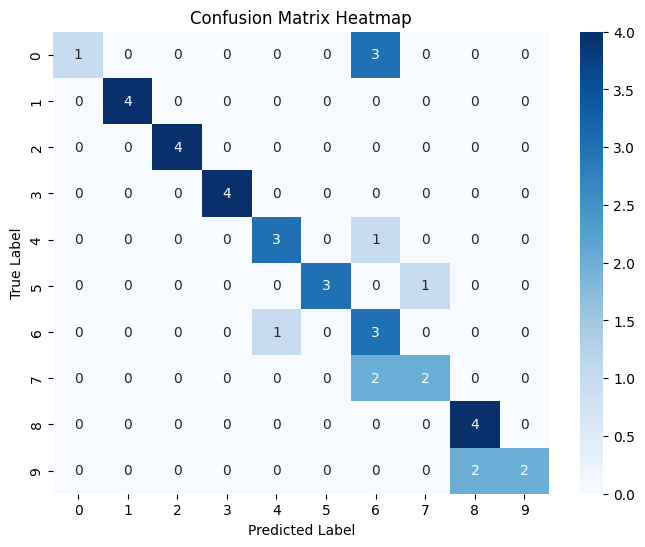

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred already exist
cm = confusion_matrix(y_test, y_pred)

labels = [str(i) for i in range(10)]  # class names 0-9

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


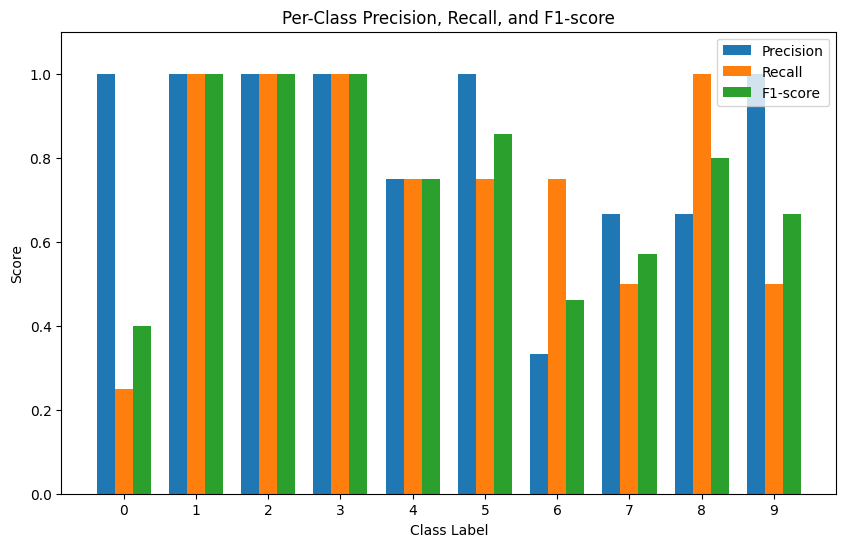

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Get classification report as a dict
report = classification_report(y_test, y_pred, output_dict=True)

# Remove the 'accuracy', 'macro avg', 'weighted avg' keys
classes = [str(i) for i in range(10)]
precision = [report[c]['precision'] for c in classes]
recall = [report[c]['recall'] for c in classes]
f1 = [report[c]['f1-score'] for c in classes]

x = np.arange(len(classes))
width = 0.25  # bar width

plt.figure(figsize=(10,6))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1-score')

plt.xticks(x, classes)
plt.ylim(0, 1.1)
plt.xlabel('Class Label')
plt.ylabel('Score')
plt.title('Per-Class Precision, Recall, and F1-score')
plt.legend()
plt.show()


In [35]:
import numpy as np

def predict_real_time(model, vectorizer):
    while True:
        text = input("Enter a sentence (or type 'quit' to exit): ")
        if text.lower() == "quit":
            break
        
        # Transform using the trained vectorizer
        X_new = vectorizer.transform([text])
        
        # Predict class
        pred_label = model.predict(X_new)[0]
        
        # If you have a label → emoji mapping
        emoji_map = {
            0: "😊",  # Example: happy
            1: "😢",  # Example: sad
            2: "😡",  # Example: angry
            3: "😂",  # Example: laughing
            4: "❤️"   # Example: love
        }
        
        print(f"Predicted Emoji: {emoji_map.get(pred_label, '?')} (Label: {pred_label})")

# Example usage after training:
predict_real_time(model, vectorizer)


Enter a sentence (or type 'quit' to exit):  i love programming


Predicted Emoji: 😊 (Label: 0)


Enter a sentence (or type 'quit' to exit):  hello0


Predicted Emoji: ? (Label: 6)


Enter a sentence (or type 'quit' to exit):  hello


Predicted Emoji: ? (Label: 6)


Enter a sentence (or type 'quit' to exit):  i am happy


Predicted Emoji: ? (Label: 5)


Enter a sentence (or type 'quit' to exit):  i am very sad


Predicted Emoji: 😂 (Label: 3)


Enter a sentence (or type 'quit' to exit):  what is happening


Predicted Emoji: ? (Label: 6)


Enter a sentence (or type 'quit' to exit):  quit


# Conclusion
- Both Logistic Regression and MLP performed well on this small dataset.
- Logistic Regression is simpler and faster, while MLP may capture more complex relationships with larger datasets.